In [ ]:
import tensorflow as tf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
device_name = tf.test.gpu_device_name()

In [ ]:
device_name 

'/device:GPU:0'

In [ ]:
cfi = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cfi.load_data()
X_train,X_test = X_train/255.0, X_test/255.0
y_train,y_test = y_train.flatten(),y_test.flatten()
K = len(set(y_train))
K

170508288/170498071 [==============================] - 13s 0us/step


10

In [ ]:
i = Input(shape = X_train[0].shape)
#x = Conv2D(32, (3,3),strides=2, activation='relu')(i)
#x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
#x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Conv2D(32, (3,3), activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3,3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Conv2D(128, (3,3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model1 = Model(i,x)


In [ ]:
model1.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])


In [ ]:
X_train.shape[0]

50000

In [ ]:
with tf.device('/device:GPU:0'):

    r = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1304/1563 [========================>.....] - ETA: 3s - loss: 1.2800 - accuracy: 0.5484

KeyboardInterrupt: ignored

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(X_train,y_train,batch_size)
with tf.device('/device:GPU:0'):

  r = model1.fit(train_generator,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
1563/1563 [==============================] - 43s 19ms/step - loss: 1.3921 - accuracy: 0.5157 - val_loss: 1.1921 - val_accuracy: 0.5866
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9662 - accuracy: 0.6631 - val_loss: 0.9151 - val_accuracy: 0.6838
Epoch 3/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8298 - accuracy: 0.7146 - val_loss: 0.7651 - val_accuracy: 0.7406
Epoch 4/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7479 - accuracy: 0.7450 - val_loss: 0.9022 - val_accuracy: 0.6976
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6850 - accuracy: 0.7660 - val_loss: 0.7046 - val_accuracy: 0.7658
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6345 - accuracy: 0.7831 - val_loss: 0.6415 - val_accuracy: 0.7915
Epoch 7/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.5926 - accuracy: 0.7987 - val_loss: 0.6574 -

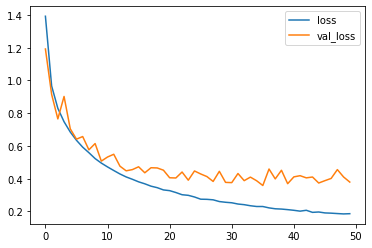

In [ ]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

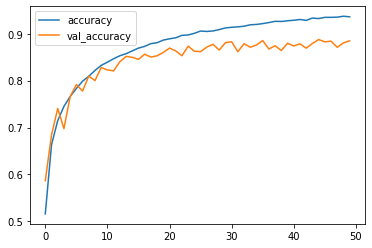

In [ ]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model1.predict(X_test).argmax(axis=1)
cf = confusion_matrix(y_test,y_pred)
cf

array([[927,   6,  14,  11,   7,   0,   3,  10,  14,   8],
       [  3, 972,   1,   0,   1,   0,   0,   0,   4,  19],
       [ 36,   1, 827,  33,  32,  20,  24,  15,   3,   9],
       [ 14,   4,  26, 781,  33,  59,  40,  20,  10,  13],
       [ 10,   3,  26,  20, 880,   8,  20,  32,   0,   1],
       [  5,   1,  13, 132,  25, 778,  17,  20,   3,   6],
       [  5,   1,  18,  26,   6,   6, 930,   2,   2,   4],
       [  8,   0,  10,  16,  17,  13,   1, 929,   2,   4],
       [ 52,  15,   8,   4,   4,   0,   1,   0, 904,  12],
       [ 23,  37,   1,   4,   0,   1,   4,   3,   6, 921]])

In [ ]:
import seaborn as sns

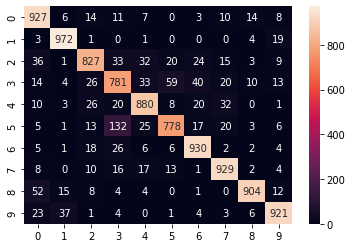

In [ ]:
sns.heatmap(cf,annot=True,fmt="g")

In [ ]:
len(np.where(y_pred != y_test)[0])

1151

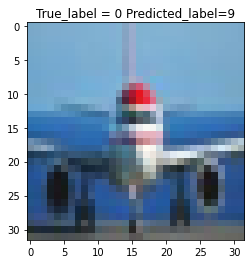

In [ ]:

miss_idx = np.where(y_pred != y_test)[0]

i = np.random.choice(miss_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title('True_label = %s Predicted_label=%s' %(y_test[i],y_pred[i]));


In [ ]:
len(miss_idx)

1151

In [ ]:
i = np.random.choice(miss_idx)
i

5433

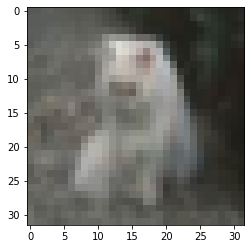

In [ ]:
plt.imshow(X_test[i],cmap='gray')